# Cats vs. Dogs

***

<img src="https://miro.medium.com/max/1400/1*biZq-ihFzq1I6Ssjz7UtdA.jpeg" alt="Alt text that describes the graphic" title="Title text" />

***

# The steps we took:

- **Importing necessary libraries** 
- **Loading and reshaping the data**
- **Spliting the data into test and train sets**
- **Dimension reduction**
- **Visualizing the data**
- **Selecting numer of components**
- **Preprossecing**
- **Model selection**
- **Hyper Parameter tuning**
- **Test**
- **Resaults**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

# Data Preprocessing:

import cv2 as cv
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, roc_auc_score, accuracy_score

# Models:

from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

# Clustering:

from sklearn.cluster import KMeans

# PCA:

from sklearn.decomposition import PCA

# ICA:

from sklearn.decomposition import FastICA

# Scaling:

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

# Cross Validation:

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

# Warings

import warnings
warnings.filterwarnings('ignore')

In [3]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [6]:
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px

In [7]:
def procces_image(img_path):
    img = cv.imread(img_path) 
    img = cv.resize(img , (32,32)) # resize image to 32 by 32 pixels, with 3 elements each

    img = img.reshape(32*32*3) # reshaping the image to a 1d array in the length of 32*32*3 
    img = np.append(img, img.ravel().mean()) # adding the mean value to the array
    return img

In [8]:
def load_data(path):
    x = []
    y = []

    for file in os.listdir(path):
        label = file.split('.')[0]
        data = procces_image("{}/{}".format(path,file))
        x.append(data) 
        y.append(label)
    return x,y

### Obtaining the data

In [9]:
# features, targets = load_data('C:\\Users\Selfisher\Desktop\school\DeiScei\Project\catsvdogs') # laptop 
features, targets = load_data(r'C:\Users\Gilad\DogsvsCats\train')    # home pc

In [10]:
features = np.asarray(features)
targets = np.asarray(targets)

In [11]:
features.shape

(25000, 3073)

In [12]:
df = pd.DataFrame(features)
df['label'] = targets

In [13]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,3064,3065,3066,3067,3068,3069,3070,3071,3072,label
0,93.0,171.0,210.0,103.0,181.0,224.0,114.0,192.0,235.0,119.0,...,4.0,4.0,1.0,3.0,3.0,1.0,3.0,3.0,119.620768,cat
1,41.0,37.0,33.0,40.0,42.0,38.0,43.0,43.0,35.0,47.0,...,45.0,62.0,45.0,48.0,66.0,31.0,36.0,51.0,72.590495,cat
2,61.0,55.0,46.0,65.0,58.0,49.0,66.0,59.0,50.0,64.0,...,160.0,162.0,34.0,157.0,169.0,4.0,193.0,194.0,108.319661,cat
3,217.0,222.0,221.0,229.0,229.0,229.0,228.0,228.0,228.0,224.0,...,202.0,202.0,215.0,215.0,214.0,207.0,212.0,215.0,164.578451,cat
4,64.0,100.0,126.0,53.0,92.0,118.0,63.0,104.0,129.0,108.0,...,72.0,86.0,77.0,101.0,116.0,55.0,82.0,94.0,103.436198,cat


In [14]:
features = df.drop(['label'], axis=1)
targets = df['label']

Splitting the data into train and test sets with random state of 42 as we agreed

In [15]:
x_train, x_test, y_train, y_test = train_test_split(features, targets ,random_state = 42)

In [16]:
y_train.value_counts() # Raughly the same amount of cats and dogs

cat    9391
dog    9359
Name: label, dtype: int64

# Dimension reduction

In [17]:
pca = PCA()
pca.fit(x_train)

PCA()

In [18]:
expl = pd.DataFrame(pca.explained_variance_ratio_*100, columns= ['var_explained'])
expl.head()

,var_explained
0,18.998383
1,10.521264
2,7.209609
3,5.701735
4,3.010888


In [19]:
expl = expl.head(250)

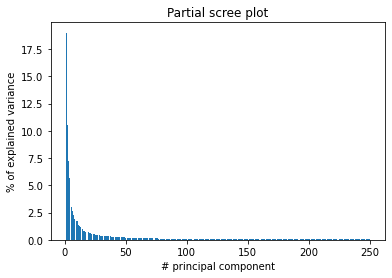

In [20]:
plt.bar(x = range(1, len(expl)+1), height = expl.var_explained)
plt.ylabel('% of explained variance')
plt.xlabel('# principal component')
plt.title('Partial scree plot')
plt.show()

In [21]:
sum(expl.iloc[:50].var_explained)

75.0607724802838

In [22]:
total_explained = []
ind =[]
for i in range(1, 300):
    ind.append(i)
    total_explained.append(sum(expl.iloc[:i].var_explained))

In [23]:
total_explained = pd.DataFrame( total_explained, index = ind, columns = ['var_explained_total'])
total_explained

,var_explained_total
1,18.998383
2,29.519646
3,36.729255
4,42.430991
5,45.441879
...,...
295,88.640355
296,88.640355
297,88.640355
298,88.640355


Here, we see how much of the variance is explained by using components 1 through X


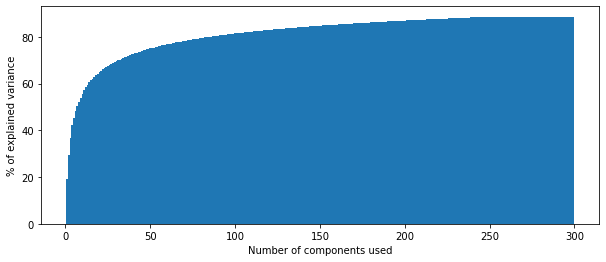

In [24]:
print('Here, we see how much of the variance is explained by using components 1 through X')
plt.figure(figsize = (10,4))
plt.bar(x = range(1, len(total_explained)+1), height = total_explained.var_explained_total, width=1)
plt.ylabel('% of explained variance')
plt.xlabel('Number of components used')
plt.show()

We hit a plato at around X = 250

In [25]:
np.max(total_explained.var_explained_total)

88.64035464495302

We can only account for 88.64% of the variance.
This means that our data is quite noisy

In [26]:
pca = PCA(n_components=0.89)
x_train_reduced = pca.fit_transform(x_train)
x_test_reduced = pca.fit_transform(x_test)
pca.n_components_

244

In [27]:
pca = PCA(n_components=0.85)
x_train_reduced = pca.fit_transform(x_train)
x_test_reduced = pca.fit_transform(x_test)
pca.n_components_

147

Text(0.5, 1.0, 'Scree plot')

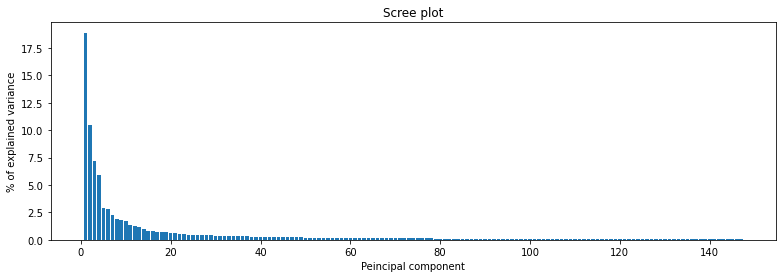

In [28]:
per_var = (pca.explained_variance_ratio_*100)

plt.figure(figsize = (13,4))
plt.bar(x=range(1,len(per_var)+1), height=per_var)
plt.ylabel('% of explained variance')
plt.xlabel('Peincipal component')
plt.title('Scree plot')


### To explain 85% of the variance we only need 147 components
We chose to use only 147 to minimize runtime in future testings without loosing a substantial amount of variance

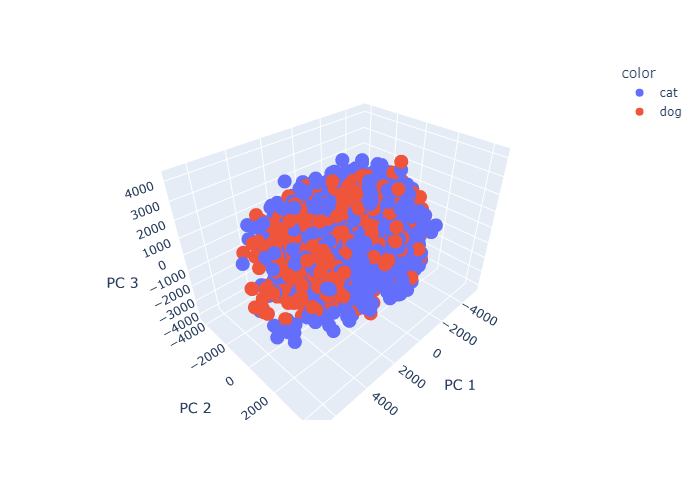

In [29]:
fig = px.scatter_3d(x_train_reduced,
    x=0, y=1, z=2, color = y_train,
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'})

fig.show('png')

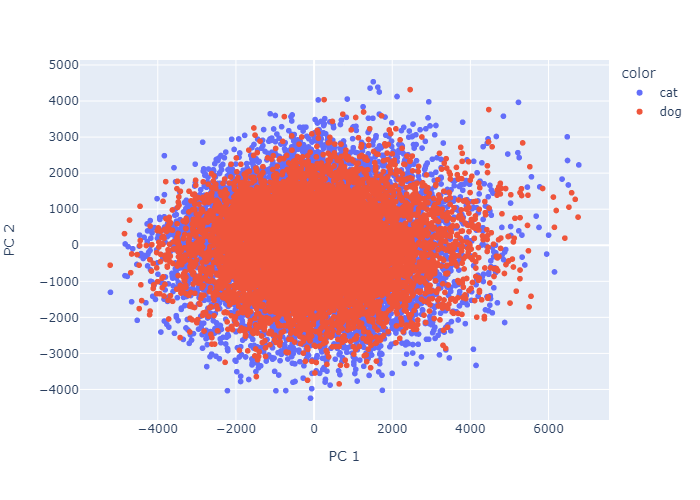

In [30]:
fig = px.scatter(x_train_reduced,
    x=0, y=1, color = y_train,
    labels={'0': 'PC 1', '1': 'PC 2'})

fig.show('png')

### Conclusions from graphs:
The data is still very noisy and the two catagories don't cluster together that much. <br>
But I still think we can get a decent accuracy

## Preprocessing
### Now we will reduce our data and scale it down so it's better suitable for most algorithms

In [32]:
preprocessor = Pipeline(([('scaler',StandardScaler()), ('pca',PCA(n_components=0.85))]))
x_train_processed = preprocessor.fit_transform(x_train)

In [33]:
pd.DataFrame(x_train_processed)

,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,155
0,32.116103,-4.242067,10.534880,32.237813,3.933156,-3.870708,9.926157,12.338024,-3.140245,6.037986,...,-0.197290,1.123880,0.141033,-0.805804,0.452694,0.342981,0.752648,-1.414811,1.264099,-0.090686
1,-9.440407,2.047672,9.406068,-22.751075,9.899042,12.036935,-1.398986,-7.650490,-1.304138,-4.494771,...,-0.353248,1.798115,-1.484575,-1.206999,1.171969,1.644035,-0.214486,-0.547273,-0.335627,-0.061609
2,-7.455281,12.322576,18.746273,-19.014104,4.575312,13.958802,-4.838900,7.405407,-2.463403,-13.885546,...,0.065789,0.655190,2.104908,0.222940,0.607090,-1.112242,0.793961,0.837418,-2.159456,-0.570468
3,-28.361639,-25.195813,2.189069,7.192308,14.815267,-2.393227,-8.465436,-0.316258,-0.923468,-7.714471,...,1.182683,-0.146038,-0.222212,-1.310262,-2.495182,1.069667,2.251653,0.162940,-1.468623,0.961253
4,-9.796369,-2.566132,12.208895,-12.991793,13.602280,9.073410,-18.939721,7.516694,-3.001884,-6.660454,...,-0.362040,-0.569321,0.318068,-1.163787,1.507706,0.790296,0.074267,2.056074,-1.714714,0.818699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18745,-28.485273,6.699900,-4.941277,-13.995914,13.506104,8.892236,-5.315394,-2.077521,4.234827,8.547305,...,-0.832853,1.685360,1.265527,-1.030833,0.678967,0.973401,-0.174530,0.841144,0.411782,-2.801223
18746,54.337835,-21.794224,1.335331,-10.553979,26.203121,-1.969992,-0.324042,-1.218019,2.330583,-2.575895,...,-0.766008,-1.334849,-0.682611,-0.715735,-1.944163,-0.999382,-0.043297,-1.388513,-0.658132,0.123138
18747,-10.227477,13.726325,-18.732310,-7.894555,-2.985082,3.252982,-4.959526,6.215810,8.600993,-9.163113,...,-0.683685,2.066637,0.410259,0.202514,-0.439205,0.089108,-0.040028,-0.172656,0.658177,0.685152
18748,15.858120,13.908308,5.843841,-2.325497,-4.322653,0.166046,-5.080591,-9.206539,-4.002537,11.970370,...,-2.560753,2.605879,0.833290,-1.093218,0.418870,-1.245166,-1.839935,-0.530950,-1.656346,-0.889152


## Dummy Classifier

In [39]:
dum = DummyClassifier(strategy= "most_frequent")

In [40]:
pred = cross_val_predict(dum, x_train_processed, y_train)
print('\033[1m' + 'Acurracy:' + '\033[0m' ,metrics.accuracy_score(y_train, pred))
print(classification_report(y_train, pred))

Acurracy: 0.5008533333333334
              precision    recall  f1-score   support

         cat       0.50      1.00      0.67      9391
         dog       0.00      0.00      0.00      9359

    accuracy                           0.50     18750
   macro avg       0.25      0.50      0.33     18750
weighted avg       0.25      0.50      0.33     18750



## KNN

In [39]:
knn = KNeighborsClassifier(n_neighbors=21)

In [42]:
pred = cross_val_predict(knn, x_train_processed, y_train)
print('\033[1m' + 'Acurracy:' + '\033[0m' ,metrics.accuracy_score(y_train, pred))
print(classification_report(y_train, pred))

Acurracy: 0.61472
              precision    recall  f1-score   support

         cat       0.64      0.54      0.58      9391
         dog       0.60      0.69      0.64      9359

    accuracy                           0.61     18750
   macro avg       0.62      0.61      0.61     18750
weighted avg       0.62      0.61      0.61     18750



## Ridge Classifier

In [43]:
ridge = linear_model.RidgeClassifierCV()

In [44]:
pred = cross_val_predict(ridge, x_train_processed, y_train)
print('\033[1m' + 'Acurracy:' + '\033[0m' ,metrics.accuracy_score(y_train, pred))
print(classification_report(y_train, pred))

Acurracy: 0.5850133333333334
              precision    recall  f1-score   support

         cat       0.58      0.60      0.59      9391
         dog       0.59      0.57      0.58      9359

    accuracy                           0.59     18750
   macro avg       0.59      0.58      0.58     18750
weighted avg       0.59      0.59      0.58     18750



## Logistic Regression

In [45]:
log = linear_model.LogisticRegression() 

In [46]:
pred = cross_val_predict(log, x_train_processed, y_train)
print('\033[1m' + 'Acurracy:' + '\033[0m' ,metrics.accuracy_score(y_train, pred))
print(classification_report(y_train, pred))

Acurracy: 0.58448
              precision    recall  f1-score   support

         cat       0.58      0.60      0.59      9391
         dog       0.59      0.57      0.58      9359

    accuracy                           0.58     18750
   macro avg       0.58      0.58      0.58     18750
weighted avg       0.58      0.58      0.58     18750



## Naive Bayes

In [43]:
bayes = GaussianNB()

In [72]:
pred = cross_val_predict(bayes, x_train_processed, y_train)
print('\033[1m' + 'Acurracy:' + '\033[0m' ,metrics.accuracy_score(y_train, pred))
print(classification_report(y_train, pred))

Acurracy: 0.6154666666666667
              precision    recall  f1-score   support

         cat       0.60      0.68      0.64      9391
         dog       0.63      0.55      0.59      9359

    accuracy                           0.62     18750
   macro avg       0.62      0.62      0.61     18750
weighted avg       0.62      0.62      0.61     18750



## SVC

In [36]:
svc = SVC(probability=True, cache_size=5000,)

In [135]:
pred = cross_val_predict(svc, x_train_processed, y_train)
print('\033[1m' + 'Acurracy:' + '\033[0m' ,metrics.accuracy_score(y_train, pred))
print(classification_report(y_train, pred))

Acurracy: 0.66384
              precision    recall  f1-score   support

         cat       0.66      0.67      0.67      9391
         dog       0.66      0.66      0.66      9359

    accuracy                           0.66     18750
   macro avg       0.66      0.66      0.66     18750
weighted avg       0.66      0.66      0.66     18750



## Decision Tree Classifier

In [132]:
tree = DecisionTreeClassifier()

In [133]:
pred = cross_val_predict(tree, x_train_processed, y_train)
print('\033[1m' + 'Acurracy:' + '\033[0m' ,metrics.accuracy_score(y_train, pred))
print(classification_report(y_train, pred))

Acurracy: 0.5420266666666667
              precision    recall  f1-score   support

         cat       0.54      0.54      0.54      9391
         dog       0.54      0.54      0.54      9359

    accuracy                           0.54     18750
   macro avg       0.54      0.54      0.54     18750
weighted avg       0.54      0.54      0.54     18750



# Ensemble models

In [124]:
n_y_train = y_train.apply(lambda x: 0 if x == 'cat' else 1) # XGBoost is spoiled and can only predict in ones and zeros

## XG Boost

In [126]:
xgb = XGBClassifier()

In [127]:
pred = cross_val_predict(xgb, x_train_processed, n_y_train)
print('\033[1m' + 'Acurracy:' + '\033[0m' ,metrics.accuracy_score(n_y_train, pred))
print(classification_report(n_y_train, pred))

Acurracy: 0.6313066666666667
              precision    recall  f1-score   support

           0       0.63      0.63      0.63      9391
           1       0.63      0.64      0.63      9359

    accuracy                           0.63     18750
   macro avg       0.63      0.63      0.63     18750
weighted avg       0.63      0.63      0.63     18750



## Random Forest

In [86]:
rft = RandomForestClassifier()

In [87]:
pred = cross_val_predict(rft, x_train_processed, y_train)
print('\033[1m' + 'Acurracy:' + '\033[0m' ,metrics.accuracy_score(y_train, pred))
print(classification_report(y_train, pred))

Acurracy: 0.6172266666666667
              precision    recall  f1-score   support

         cat       0.61      0.66      0.63      9391
         dog       0.63      0.58      0.60      9359

    accuracy                           0.62     18750
   macro avg       0.62      0.62      0.62     18750
weighted avg       0.62      0.62      0.62     18750



## Ada Boost

In [88]:
ada = AdaBoostClassifier()

In [89]:
pred = cross_val_predict(ada, x_train_processed, y_train)
print('\033[1m' + 'Acurracy:' + '\033[0m' ,metrics.accuracy_score(y_train, pred))
print(classification_report(y_train, pred))

Acurracy: 0.6057066666666666
              precision    recall  f1-score   support

         cat       0.61      0.60      0.60      9391
         dog       0.60      0.61      0.61      9359

    accuracy                           0.61     18750
   macro avg       0.61      0.61      0.61     18750
weighted avg       0.61      0.61      0.61     18750



## Stacking Classifier
### Using Logistic Regression, Naive Bayes, KNN and SVC as a final estimator

In [46]:
stack = StackingClassifier(estimators = [('Logistic Regression', log), ('Naive Bayes', bayes), ('knn', knn)],
                           final_estimator = svc, n_jobs = -1) 

In [47]:
pred = cross_val_predict(stack, x_train_processed, y_train)
print('\033[1m' + 'Acurracy:' + '\033[0m' ,metrics.accuracy_score(y_train, pred))
print(classification_report(y_train, pred))

Acurracy: 0.64784
              precision    recall  f1-score   support

         cat       0.65      0.65      0.65      9391
         dog       0.65      0.65      0.65      9359

    accuracy                           0.65     18750
   macro avg       0.65      0.65      0.65     18750
weighted avg       0.65      0.65      0.65     18750



## VotingClassifier
### Using hard voting on SVC, KNN, and Logistic Regression

In [61]:
vot = VotingClassifier(estimators = [('svc', svc ), ('knn', knn), ('log', log)], voting='hard')

In [62]:
pred = cross_val_predict(vot, x_train_processed, y_train)
print('\033[1m' + 'Acurracy:' + '\033[0m' ,metrics.accuracy_score(y_train, pred))
print(classification_report(y_train, pred))

Acurracy: 0.64768
              precision    recall  f1-score   support

         cat       0.65      0.63      0.64      9391
         dog       0.64      0.67      0.65      9359

    accuracy                           0.65     18750
   macro avg       0.65      0.65      0.65     18750
weighted avg       0.65      0.65      0.65     18750



## VotingClassifier
### Using soft voting on SVC, KNN, and Logistic Regression

In [50]:
vot = VotingClassifier(estimators = [('svc', svc ), ('knn', knn), ('log', log)], voting='soft')

In [122]:
pred = cross_val_predict(vot, x_train_processed, y_train)
print('\033[1m' + 'Acurracy:' + '\033[0m' ,metrics.accuracy_score(y_train, pred))
print(classification_report(y_train, pred))

Acurracy: 0.65392
              precision    recall  f1-score   support

         cat       0.66      0.63      0.65      9391
         dog       0.65      0.68      0.66      9359

    accuracy                           0.65     18750
   macro avg       0.65      0.65      0.65     18750
weighted avg       0.65      0.65      0.65     18750



# Adding clustering to the mix

In [82]:
#preprocessor = Pipeline(([('scaler',StandardScaler()), ('pca',PCA(n_components=0.85))]))
pipe = Pipeline(([('Kmeans', KMeans(n_clusters = 30)), ('Logistic Regression', vot)]))

In [83]:
pred = cross_val_predict(pipe, x_train_processed, y_train)
print('\033[1m' + 'Acurracy:' + '\033[0m' ,metrics.accuracy_score(y_train, pred))
print(classification_report(y_train, pred))

Acurracy: 0.5987733333333334
              precision    recall  f1-score   support

         cat       0.61      0.56      0.58      9391
         dog       0.59      0.64      0.61      9359

    accuracy                           0.60     18750
   macro avg       0.60      0.60      0.60     18750
weighted avg       0.60      0.60      0.60     18750



#### Like we saw in the 3-D graph above, the data doens't cluster to distinct groups of cats and dog and I believe that this is the   reason why clustering is not suitable for this dataset in perticular

## AND THE WINNER IS: 

## SVC!  with the accuracy of 66%

# Our next step is Hyper-Parameter tuning

### First, we will the aproximate range of the optimal parameter values
this should help with the run time in the future

In [72]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [73]:
rand_ser = RandomizedSearchCV(svc,
                              param_distributions = param_grid,
                              n_iter = 100,
                              n_jobs = -1,
                              cv = 5, scoring = 'accuracy')

In [74]:
rand_ser.fit(x_train_processed, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(cache_size=5000, probability=True),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['rbf', 'poly', 'sigmoid']},
                   scoring='accuracy')

In [75]:
best_ = rand_ser.best_params_
print(best_)

{'kernel': 'rbf', 'gamma': 0.001, 'C': 1}


In [76]:
rand_ser.best_score_

0.6645866666666667

Now we will find the exact parameters that are best for us

In [77]:
param_grid = {'C': [0.5,1, 5], 'gamma': [0.001,0.0001],'kernel': ['rbf']}

In [78]:
rand_ser = RandomizedSearchCV(svc,
                              param_distributions = param_grid,
                              n_iter = 100,
                              n_jobs = -1,
                              cv = 5, scoring = 'accuracy')

In [79]:
rand_ser.fit(x_train_processed, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(cache_size=5000, probability=True),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.5, 1, 5],
                                        'gamma': [0.001, 0.0001],
                                        'kernel': ['rbf']},
                   scoring='accuracy')

In [80]:
best_ = rand_ser.best_params_
print(best_)

{'kernel': 'rbf', 'gamma': 0.001, 'C': 1}


In [81]:
rand_ser.best_score_

0.6645866666666667

## We got it! 

# Testing

### First we preprocess the test set the same way we did the train set

Define a new SVC instant using the parameters we found

In [48]:
x_test_processed = preprocessor.transform(x_test)

In [49]:
svc = SVC(probability=True, cache_size=5000, kernel = 'rbf', gamma = 0.001, C = 1)

In [50]:
svc.fit(x_train_processed, y_train)

SVC(C=1, cache_size=5000, gamma=0.001, probability=True)

In [51]:
fin_pred = svc.predict(x_test_processed)

In [52]:
print('\033[1m' + 'Acurracy:' + '\033[0m' ,metrics.accuracy_score(y_test, fin_pred))
print(classification_report(y_test, fin_pred))

Acurracy: 0.6736
              precision    recall  f1-score   support

         cat       0.66      0.71      0.68      3109
         dog       0.69      0.63      0.66      3141

    accuracy                           0.67      6250
   macro avg       0.67      0.67      0.67      6250
weighted avg       0.67      0.67      0.67      6250



# In Conclusion
We found the best model to be SVC 
After Hyper Parameter tuning using RandomizedSearchCV, we got the test accuracy of:
### 67.36%